In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import seaborn as sns
titanic=sns.load_dataset("titanic")
titanic #loading dataset into titanic variable

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
titanic.count()#no. Of values in each feature.

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [ ]:
titanic.isna().sum() #no. Of Nan values in each feature.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:

#As deck have max. No. Of Nan values which have more then 50% of Nan values.
#so we can drop this column.

In [ ]:
#Checking the sex of child. 
titanic.loc[titanic["who"]=="child",["who","sex"]]

,who,sex
7,child,male
9,child,female
10,child,female
14,child,female
16,child,male
...,...,...
831,child,male
850,child,male
852,child,female
869,child,male


In [ ]:
titanic["who"].unique()#checking unique values in who feature.

array(['man', 'woman', 'child'], dtype=object)

In [ ]:
titanic.info() #getting all the details about the features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:

#average age of man.
avg_age_man=round(titanic.loc[titanic["who"]=="man","age"].mean(),0)
#average age of female.
avg_age_woman=round(titanic.loc[titanic["who"]=="woman","age"].mean(),0)
#average age of female  child. 
avg_age_child_f=round(titanic.loc[(titanic["who"]=="child") & (titanic["sex"]=="male"),"age"].mean(),0)
#average age of male child. 
avg_age_child_m=round(titanic.loc[(titanic["who"]=="child") & (titanic["sex"]=="female"),"age"].mean(),0)
print(" Average age of man",avg_age_man,
      "\n Average age of woman", avg_age_woman,
      "\n Average age of female child", avg_age_child_f,
      "\n Average age of male child", avg_age_child_m)

 Average age of man 33.0 
 Average age of woman 32.0 
 Average age of female child 5.0 
 Average age of male child 7.0


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


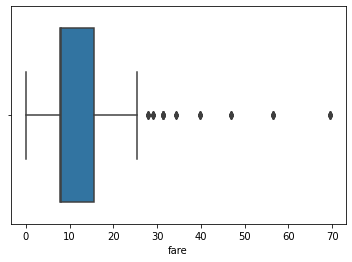

In [ ]:
#to check the outlier we have to plot boxplot
sns.boxplot(titanic["fare"].where(titanic["class"]=="Third"))

In [ ]:
titanic.where(titanic["fare"]==titanic["fare"].max()).dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
679,1.0,1.0,male,36.0,0.0,1.0,512.3292,C,First,man,True,B,Cherbourg,yes,False
737,1.0,1.0,male,35.0,0.0,0.0,512.3292,C,First,man,True,B,Cherbourg,yes,True


# ...Visualisation Starts from here.....

## Q.1 find the percentage of no. of man, woman, child survived with respect to total no. of man, woman, child present on the ship.

In [ ]:
m=titanic["age"].loc[(titanic["who"]=="man")&(titanic["survived"]==1)].count()
w=titanic["age"].loc[(titanic["who"]=="woman")&(titanic["survived"]==1)].count()
c=titanic["age"].loc[(titanic["who"]=="child")&(titanic["survived"]==1)].count()

m,w,c
totalM=titanic["age"].loc[(titanic["who"]=="man")].count()
totalW=titanic["age"].loc[(titanic["who"]=="woman")].count()
totalC=titanic["age"].loc[(titanic["who"]=="child")].count()

print("percentage of man survived",m/totalM*100)
print("percentage of woman survived",w/totalW*100)
print("percentage of child survived",c/totalC*100)
m,w,c

percentage of man survived 17.433414043583532
percentage of woman survived 77.52293577981652
percentage of child survived 59.036144578313255


(72, 169, 49)

## Q.2 Average fare price & no. of ticket sold of the 1st, 2nd, 3rd passenger class. plot a graph 

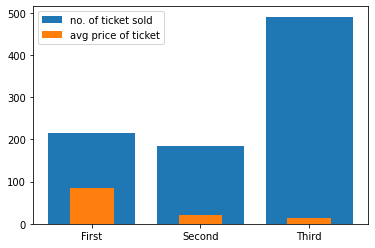

In [ ]:
avg_fare_1class=titanic["fare"].where(titanic["class"]=="First").mean()
avg_fare_2class=titanic["fare"].where(titanic["class"]=="Second").mean()
avg_fare_3class=titanic["fare"].where(titanic["class"]=="Third").mean()
class1_sold=titanic["fare"].where(titanic["class"]=="First").count()
class2_sold=titanic["fare"].where(titanic["class"]=="Second").count()
class3_sold=titanic["fare"].where(titanic["class"]=="Third").count()
c=["First","Second","Third"]
avg_class=[avg_fare_1class,avg_fare_2class,avg_fare_3class]
plt.bar(c,[class1_sold,class2_sold,class3_sold])
plt.bar(c,avg_class,0.4)
plt.legend(["no. of ticket sold","avg price of ticket"])

## Q.3 plot the bar graph of the man,woman and child survived in each class.

Text(0, 0.5, 'no. of people survived')

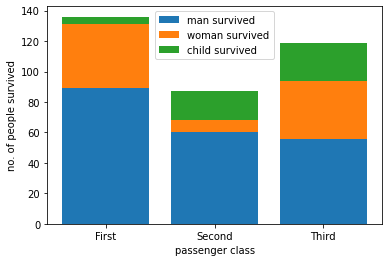

In [ ]:
classes=["First", "Second", "Third"]
woman_survived=[]
man_survived=[]
child_survived=[]
pclass=[1,2,3]
for i in  pclass:
    w=titanic["who"].where(titanic["who"]=="woman").where(titanic["survived"]==1).where(titanic["pclass"]==i).count()
    m=titanic["who"].where(titanic["who"]=="man").where(titanic["survived"]==1).where(titanic["pclass"]==i).count()
    c=titanic["who"].where(titanic["who"]=="child").where(titanic["survived"]==1).where(titanic["pclass"]==i).count()
    woman_survived.append(w)
    man_survived.append(m)
    child_survived.append(c)
    
plt.bar(classes,woman_survived)
plt.bar(classes,man_survived,bottom=woman_survived)
a=[sum(i) for i in zip(man_survived,woman_survived)]
plt.bar(classes,child_survived,bottom=a)
plt.legend(["man survived","woman survived","child survived"])
plt.xlabel("passenger class")
plt.ylabel("no. of people survived")

## Q.4 correlation between different attrubutes.

In [ ]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
mapping1={"man":1,"woman":2,"child":3}
titanic["who"]=titanic["who"].map(mapping1)

In [ ]:
mapping={"C":1,"S":2,"Q":3}
titanic["embarked"]=titanic["embarked"].map(mapping)

In [ ]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.126753,0.472637,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.307324,-0.016018,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.042340,-0.468941,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.031095,0.342977,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.035756,0.413947,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.269588,0.136513,-0.182024,-0.271832
embarked,-0.126753,0.307324,-0.042340,0.031095,-0.035756,-0.269588,1.000000,-0.021399,0.008794,0.119441
who,0.472637,-0.016018,-0.468941,0.342977,0.413947,0.136513,-0.021399,1.000000,-0.914615,-0.452753
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,0.008794,-0.914615,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.119441,-0.452753,0.404744,1.000000


## Q.5 plot the bar graph between 'alone' and 'survived'

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2.0,Third,1,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,1.0,First,2,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2.0,Third,2,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,2.0,First,2,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2.0,Third,1,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,2.0,Second,1,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,2.0,First,2,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,2.0,Third,2,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,1.0,First,1,True,C,Cherbourg,yes,True


#more no. of alone male survived


Text(0.5, 0, 'alone people')

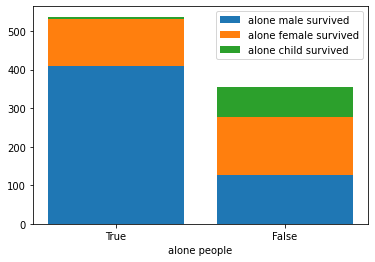

In [ ]:
alone1=[True, False]
alone=["True", "False"]
alone_male_survived=[]
alone_female_survived=[]
alone_child_survived=[]
for i in alone1:
    m1=titanic["sex"].where(titanic["who"]==1).where(titanic["alone"]==i).count()
    f1=titanic["sex"].where(titanic["who"]==2).where(titanic["alone"]==i).count()
    c1=titanic["sex"].where(titanic["who"]==3).where(titanic["alone"]==i).count()
    alone_male_survived.append(m1)
    alone_female_survived.append(f1)
    alone_child_survived.append(c1)

plt.bar(alone,alone_male_survived)
plt.bar(alone,alone_female_survived,bottom=alone_male_survived)
a=[sum(i) for i in zip(alone_male_survived,alone_female_survived)]
plt.bar(alone,alone_child_survived,bottom=a)
plt.legend(["alone male survived","alone female survived","alone child survived"])
print("#more no. of alone male survived")
plt.xlabel("alone people")

## Q.6 plot the histogram of "fare" &"age".and determine the skewness of the data.

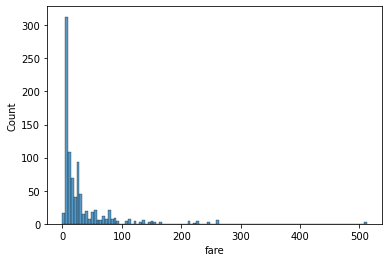

In [ ]:
sns.histplot(titanic["fare"]) 
#fare price is negatively skewed, so more no. of ticket is sold at lower price

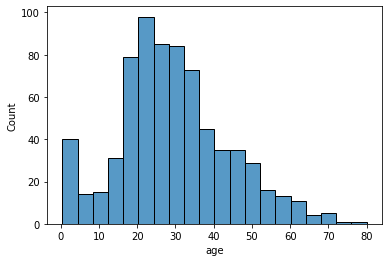

In [ ]:
sns.histplot(titanic["age"]) #more no. of adult people between age 20 to 40 were there.

## Q.7 see the box plot of "fare" attribute and determine the lowerlimit and upperlimit of the fare price.


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


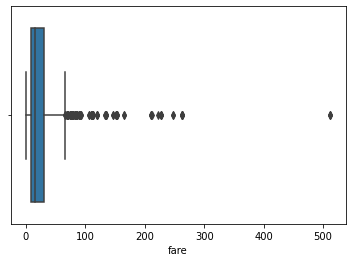

In [ ]:
sns.boxplot(titanic["fare"])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

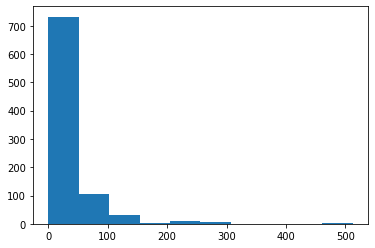

In [ ]:
plt.hist(titanic["fare"])

In [ ]:
Q1=titanic["fare"].quantile(.25)
Q3=titanic["fare"].quantile(.75)
IQR=Q3-Q1 #Inter Quartile Range
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

if lower_limit<=titanic["fare"].min():
    lower_limit=titanic["fare"].min()
lower_limit,upper_limit

def fare(values):
    if values>upper_limit:
        return upper_limit
    else:
        return values
    
titanic["fare"]=titanic["fare"].map(fare)


(array([ 22., 406.,  85.,  89.,  80.,  24.,  14.,  22.,  26., 123.]),
 array([ 0.     ,  6.56344, 13.12688, 19.69032, 26.25376, 32.8172 ,
        39.38064, 45.94408, 52.50752, 59.07096, 65.6344 ]),
 <a list of 10 Patch objects>)

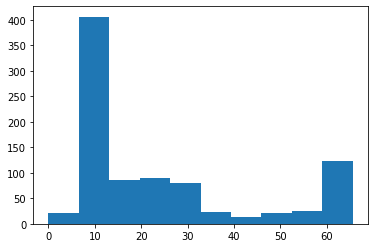

In [ ]:
plt.hist(titanic["fare"])

## Q.8 no. of man, woman, child board in the ship from different embark_town.

In [ ]:
titanic.groupby(["embark_town","who"])["fare"].count().reset_index()

,embark_town,who,fare
0,Cherbourg,1,90
1,Cherbourg,2,60
2,Cherbourg,3,18
3,Queenstown,1,37
4,Queenstown,2,35
5,Queenstown,3,5
6,Southampton,1,410
7,Southampton,2,174
8,Southampton,3,60


In [ ]:
count

,index,embark_town
0,Southampton,644
1,Cherbourg,168
2,Queenstown,77


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

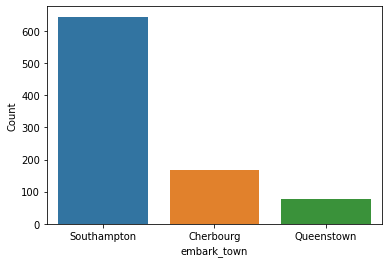

In [ ]:
sns.barplot(count["index"],count["embark_town"])
plt.xlabel("embark_town")
plt.ylabel("Count")

## Q.9 find the plot between embark_town and fare price

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 54.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 46.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


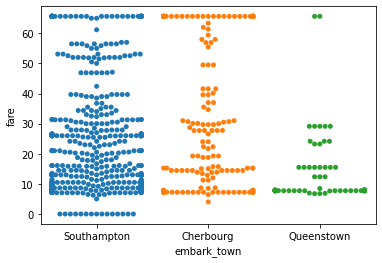

In [ ]:
sns.swarmplot(titanic["embark_town"],titanic["fare"])

## Q.10 Percetage of people survived from different embarked towns.

In [ ]:
list(titanic["embark_town"].dropna().unique())


['Southampton', 'Cherbourg', 'Queenstown']

Text(0, 0.5, 'percentage of people survived')

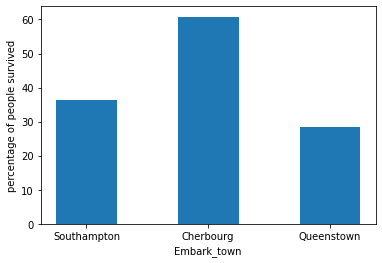

In [ ]:
Embarked=titanic["embark_town"].dropna().unique()
Total_in_embark=[]
Survived_in_embark=[]
for i in Embarked:
    s1=titanic["age"].where(titanic["embark_town"]==i).count()
    s=titanic["age"].where(titanic["survived"]==1).where(titanic["embark_town"]==i).count()
    Total_in_embark.append(s1)
    Survived_in_embark.append(s)
    
percentage_survived=[]
for i in range (len(Total_in_embark)):
    p=Survived_in_embark[i]/Total_in_embark[i]*100
    percentage_survived.append(p)
plt.bar(Embarked,percentage_survived,0.5)
plt.xlabel("Embark_town")
plt.ylabel("percentage of people survived")

In [ ]:
titanic

In [ ]:
titanic["fare"].max()

In [ ]:
titanic.to_csv("trasformed_titanic",index=False)#forming the different csv file in folder.